# About this file
CSV file which tells which of the users purchased/not purchased a particular product

Import Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
# importing dataset
data = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
data.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [6]:
# Number of rows and columns
data.shape

(400, 3)

In [7]:
# Checking for null values
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
# Spliting data
X = np.array(data[['Age','EstimatedSalary']])
Y = np.array(data[['Purchased']])

In [11]:
print(X.shape)

(400, 2)


In [12]:
print(Y.shape)

(400, 1)


In [13]:
# Spliting into train_test features
X_train, X_test,Y_train, Y_test  = train_test_split(X,Y, random_state=6, test_size=0.10)

# Model Training

In [14]:
# Model training using various algorithms
logistic = LogisticRegression()
decision = DecisionTreeClassifier()
naviebayes = BernoulliNB()
knearest = KNeighborsClassifier()
passive = PassiveAggressiveClassifier()

In [15]:
logistic.fit(X_train,Y_train.ravel())
decision.fit(X_train,Y_train.ravel())
naviebayes.fit(X_train,Y_train.ravel())
knearest.fit(X_train,Y_train.ravel())
passive.fit(X_train,Y_train.ravel())

PassiveAggressiveClassifier()

In [16]:
data1 = { "Classification Algorithm": ["Logistic Regression", "DecisionTreeClassifier", "BernoulliNB",
                                       "KNeighborsClassifier","PassiveAggressiveClassifier"],
          "Training Score" : [logistic.score(X_train,Y_train),decision.score(X_train,Y_train),naviebayes.score(X_train,Y_train),
                     knearest.score(X_train,Y_train),passive.score(X_train,Y_train)]
         }
df = pd.DataFrame(data1)
df

,Classification Algorithm,Training Score
0,Logistic Regression,0.641667
1,DecisionTreeClassifier,0.997222
2,BernoulliNB,0.641667
3,KNeighborsClassifier,0.855556
4,PassiveAggressiveClassifier,0.641667


In [17]:
data2 = { "Classification Algorithm": ["Logistic Regression", "DecisionTreeClassifier", "BernoulliNB",
                                       "KNeighborsClassifier","PassiveAggressiveClassifier"],
          "Testing Score" : [logistic.score(X_test,Y_test),decision.score(X_test,Y_test),naviebayes.score(X_test,Y_test),
                     knearest.score(X_test,Y_test),passive.score(X_test,Y_test)]
         }
df = pd.DataFrame(data2)
df

,Classification Algorithm,Testing Score
0,Logistic Regression,0.65
1,DecisionTreeClassifier,0.90
2,BernoulliNB,0.65
3,KNeighborsClassifier,0.80
4,PassiveAggressiveClassifier,0.65


# Confusion Matrix

We can see that accuracy achieved using Decision Tree Classifier is way better than other classification algorithms, hence we summarize the performance of the above model by plotting the Confusion Matrix



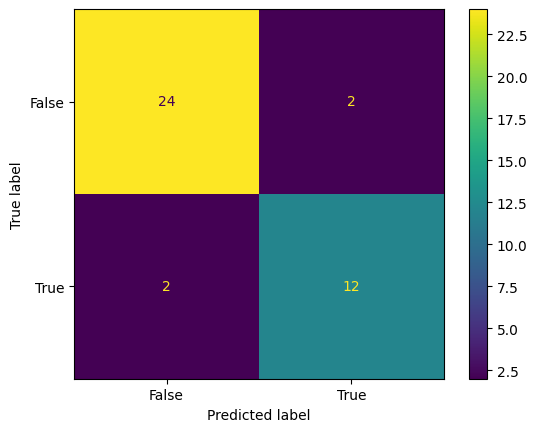

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics

X_test_prediction = decision.predict(X_test)
confusion_matrix = metrics.confusion_matrix(X_test_prediction,Y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

As we can see in the above matrix, there are **24 + 12 = 36 correct predictions** and **2 + 2 = 4 Incorrect predictions** out of **40** samples